<a name='index'></a>
# Index
* [Step 1 - Import required libraries](#step-1)
* [Step 2 - Git clone Yet-Another-EfficientDet](#step-2)
* [Step 3 - CSV to JSON (Coco dataset)](#step-3)
* [Step 4 - Mount Google drive](#step-4)
* [Step 5 - Run and create yolo dataset](#step-5)
* [Step 6 - Train Efficientdet model](#step-6)
* [Step 7 - Evaluate Efficientdet model](#step-7)
* [Step 8 - Inference Test data results](#step-8)
* [Step 9 - Visualize Test results](#step-9)

<a name='step-1'></a>
### **Step 1**: Import required libraries
[Back to Index](#index)

In [ ]:
!pip install -q pycocotools 
!pip install -q numpy==1.16.0
!pip install -q opencv-python 
!pip install -q tqdm 
!pip install -q tensorboard 
!pip install -q tensorboardX 
!pip install -q pyyaml 
!pip install -q webcolors 
!pip install -q matplotlib
!pip install -q torch==1.4.0
!pip install -q torchvision==0.5.0

In [ ]:
from tqdm.notebook import tqdm
import pandas as pd
from PIL import Image
from datetime import datetime
from matplotlib import patches

<a name='step-2'></a>
### **Step 2**: Git clone Yet-Another-EfficientDet
[Back to Index](#index)

In [ ]:
import os
import sys
from IPython.display import clear_output
!git clone --depth 1 https://github.com/zylo117/Yet-Another-EfficientDet-Pytorch
os.chdir('Yet-Another-EfficientDet-Pytorch')
sys.path.append('.')
! mkdir weights
! wget https://github.com/zylo117/Yet-Another-EfficientDet-Pytorch/releases/download/1.0/efficientdet-d0.pth -O weights/efficientdet-d0.pth
clear_output()

In [ ]:
import torch
from torch.backends import cudnn

from backbone import EfficientDetBackbone
import cv2
import matplotlib.pyplot as plt
import numpy as np

from efficientdet.utils import BBoxTransform, ClipBoxes
from utils.utils import preprocess, invert_affine, postprocess

<a name='step-3'></a>
### **Step 3**: CSV to JSON (Coco dataset)
[Back to Index](#index)

In [ ]:
# import numpy as np
# import json
# import pandas as pd

# path = '/content/drive/MyDrive/rsna/coco_data_format/rsna_coco_val.csv'
# save_json_path = '/content/drive/MyDrive/rsna/coco_data_format/rsna_coco_val.json'


# data = pd.read_csv(path)

# images = []
# categories = []
# annotations = []

# category = {}
# category["supercategory"] = 'none'
# category["id"] = 0
# category["name"] = 'None'
# categories.append(category)

# data['fileid'] = data['filename'].astype('category').cat.codes
# data['categoryid']= pd.Categorical(data['class'],ordered= True).codes
# data['categoryid'] = data['categoryid']+1
# data['annid'] = data.index

# def image(row):
#     image = {}
#     image["height"] = row.height
#     image["width"] = row.width
#     image["id"] = row.fileid
#     image["file_name"] = row.filename
#     return image

# def category(row):
#     category = {}
#     category["supercategory"] = 'None'
#     category["id"] = row.categoryid
#     category["name"] = row[2]
#     return category

# def annotation(row):
#     annotation = {}
#     area = (row.xmax -row.xmin)*(row.ymax - row.ymin)
#     annotation["segmentation"] = []
#     annotation["iscrowd"] = 0
#     annotation["area"] = area
#     annotation["image_id"] = row.fileid

#     annotation["bbox"] = [row.xmin, row.ymin, row.xmax -row.xmin,row.ymax-row.ymin ]

#     annotation["category_id"] = row.categoryid
#     annotation["id"] = row.annid
#     return annotation

# for row in data.itertuples():
#     annotations.append(annotation(row))

# imagedf = data.drop_duplicates(subset=['fileid']).sort_values(by='fileid')
# for row in imagedf.itertuples():
#     images.append(image(row))

# catdf = data.drop_duplicates(subset=['categoryid']).sort_values(by='categoryid')
# for row in catdf.itertuples():
#     categories.append(category(row))

# data_coco = {}
# data_coco["images"] = images
# data_coco["categories"] = categories
# data_coco["annotations"] = annotations


# json.dump(data_coco, open(save_json_path, "w"), indent=4)

<a name='step-4'></a>
### **Step 4**: Mount Google drive
[Back to Index](#index)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a name='step-5'></a>
### **Step 5**: Copy rsna data to datasets folder
[Back to Index](#index)

In [ ]:
! mkdir datasets

%cp -r \
"/content/drive/MyDrive/rsna/dataset_formats/coco/eff_data/rsna" \
"/content/Yet-Another-EfficientDet-Pytorch/datasets"

%cp -r \
"/content/drive/MyDrive/rsna/dataset_formats/coco/eff_data/rsna.yml" \
"/content/Yet-Another-EfficientDet-Pytorch/projects"

<a name='step-6'></a>
### **Step 6**: Train Efficientdet model
[Back to Index](#index)

In [ ]:
! python train.py -c 0 \
                  -p rsna \
                  --head_only True \
                  --lr 5e-2 \
                  --batch_size 32 \
                  --load_weights weights/efficientdet-d0.pth  \
                  --num_epochs 1 \
                  #--save_interval 100
%cp \
"/content/Yet-Another-EfficientDet-Pytorch/logs/rsna/efficientdet-d0_0_169.pth" \
"/content/drive/MyDrive/rsna/weights/efficientdet-d0_0_169.pth"

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[Warning] Ignoring Error(s) in loading state_dict for EfficientDetBackbone:
	size mismatch for classifier.header.pointwise_conv.conv.weight: copying a param with shape torch.Size([810, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([9, 64, 1, 1]).
	size mismatch for classifier.header.pointwise_conv.conv.bias: copying a param with shape torch.Size([810]) from checkpoint, the shape in current model is torch.Size([9]).
[Warning] Don't panic if you see this, this might be because you load a pretrained weights with different number of classes. The rest of the weights should be loaded already.
[Info] loaded weights: efficientdet-d0.pth, resuming checkpoint from step: 0
[Info] freezed backbone
Step: 168. Epoch: 0/1. Iteration: 169/169. Cls loss: 0.62961. Reg loss: 5.06740. Total loss: 5.69701: 100% 169/169 [

<a name='step-7'></a>
### **Step 7**: Evaluate Efficientdet model
[Back to Index](#index)

In [ ]:
#get latest weight file
%cd logs/rsna
weight_file = !ls -Art | grep efficientdet
%cd ../..

weight_file[-1] = 'efficientdet-d0_0_169.pth'

! python coco_eval.py -c 0 \
                      -p rsna \
                      -w "logs/rsna/{weight_file[-1]}"

/content/Yet-Another-EfficientDet-Pytorch/logs/rsna
/content/Yet-Another-EfficientDet-Pytorch
running coco-style evaluation on project rsna, weights logs/rsna/efficientdet-d0_0_169.pth...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
100% 602/602 [00:50<00:00, 11.97it/s]
Loading and preparing results...
DONE (t=1.43s)
creating index...
index created!
BBox
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.00s).
Accumulating evaluation results...
DONE (t=0.44s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.009
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.041
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] =

<a name='step-8'></a>
### **Step 8**: Inference Test data results
[Back to Index](#index)

In [ ]:
def inference(base_dir,patients_list,threshold,weight_path):
  results = {
    "patientId":[],
    "PredictionString":[]
  }
  for pid in tqdm(patients_list):
    compound_coef = 0
    force_input_size = None  # set None to use default size
    # results["patientId"].append(img_path\
    #                  .split("/")[-1]\
    #                  .split(".")[0]
    #                  )
    results["patientId"].append(
        pid
    )
    img_path = os.path.join(
        base_dir,
        pid+".jpg"
    )
    #print(img_path)
    #img_path = '/content/Yet-Another-EfficientDet-Pytorch/datasets/rsna/validation/03f8bb03-eb04-4365-ac4d-d63d2b5d49cc.jpg'
    #img_path = "/content/Yet-Another-EfficientDet-Pytorch/datasets/shape/val/904.jpg"
    # threshold = 0.29
    # iou_threshold = 0.29
    threshold = threshold
    iou_threshold = threshold

    use_cuda = True
    use_float16 = False
    cudnn.fastest = True
    cudnn.benchmark = True

    obj_list = [ 'Pneumonia' ]

    input_sizes = [512, 640, 768, 896, 1024, 1280, 1280, 1536]
    input_size = input_sizes[compound_coef] if force_input_size is None else force_input_size
    ori_imgs, framed_imgs, framed_metas = preprocess(img_path, max_size=input_size)

    if use_cuda:
        x = torch.stack([torch.from_numpy(fi).cuda() for fi in framed_imgs], 0)
    else:
        x = torch.stack([torch.from_numpy(fi) for fi in framed_imgs], 0)

    x = x.to(torch.float32 if not use_float16 else torch.float16).permute(0, 3, 1, 2)

    model = EfficientDetBackbone(compound_coef=compound_coef, num_classes=len(obj_list),

                                # replace this part with your project's anchor config
                                ratios=[(1.0, 1.0), (1.3, 0.8), (1.9, 0.5)],
                                scales=[2 ** 0, 2 ** (1.0 / 3.0), 2 ** (2.0 / 3.0)])

    #model.load_state_dict(torch.load('logs/rsna/'+weight_file[-1]))
    weight_path
    model.load_state_dict(torch.load(weight_path))
    model.requires_grad_(False)
    model.eval()

    if use_cuda:
        model = model.cuda()
    if use_float16:
        model = model.half()

    with torch.no_grad():
        features, regression, classification, anchors = model(x)

        regressBoxes = BBoxTransform()
        clipBoxes = ClipBoxes()

        out = postprocess(x,
                          anchors, regression, classification,
                          regressBoxes, clipBoxes,
                          threshold, iou_threshold)

    out = invert_affine(framed_metas, out)
    
    box_str = ""
    for idx,score in enumerate(out[0]["scores"]):
      one_box = out[0]["rois"][idx].round(2)
      #print(one_box[0])
      box = "{} {} {} {} {}".format(
          str(score.round(2)),
          str(one_box[0]),
          str(one_box[1]),
          str(round(one_box[2]-one_box[0],2)), 
          str(round(one_box[3]-one_box[1],2)),
      )
      box_str = " ".join([box_str,box])
    results["PredictionString"].append(
        box_str.strip()
    )
  return pd.DataFrame(results)

In [ ]:
%cp \
"/content/Yet-Another-EfficientDet-Pytorch/logs/rsna/efficientdet-d0_0_169.pth" \
"/content/drive/MyDrive/rsna/weights/weights_27_Feb.pth"

In [ ]:
weight_path = "/content/drive/MyDrive/rsna/weights/effcientdet/efficientdet-d0_9_1600.pth"
test_data   = pd.read_csv("/content/drive/MyDrive/rsna/stage_2_sample_submission.csv")
test_dir    = "/content/drive/MyDrive/rsna/jpg_stage_2_test_images"
test_data   = test_data["patientId"].tolist()
threshold   = 0.29
results     = inference(test_dir,test_data,threshold,weight_path)

In [ ]:
now         = datetime.now()
dt_string   = now.strftime("%d_%m_%Y_%H_%M_%S")
file_path   = "/content/drive/MyDrive/rsna/rsna_results/effcientdet/" + "result_"+dt_string+".csv"
results.to_csv(file_path,index=False)

<a name='step-9'></a>
### **Step 9**: Visualize Test results
[Back to Index](#index)

In [ ]:
def create_result_images(base_dir,df):
  plt.figure(figsize=(10,10))
  for idx, row in df.iterrows():
    ax = plt.subplot(5,3,idx+1,xticks = [],yticks=[])
    path = os.path.join(
        base_dir,
        row["patientId"]+".jpg"
        )
    img = Image.open(path)
    ax.imshow(img,cmap="gray")

    if row["PredictionString"] != "":
      boxes = [float(i) for i in row['PredictionString'].strip().split(" ")]
      for i in range(0,len(boxes),5):
        confidence,xmin,ymin,width,height = boxes[i],\
                                            boxes[i+1],\
                                            boxes[i+2],\
                                            boxes[i+3],\
                                            boxes[i+4]
        rect = patches.Rectangle(
            (xmin, ymin),
            width,
            height,
            linewidth=2,
            edgecolor="r",
            facecolor="none",
        )
        ax.add_patch(rect)
  plt.show()
  plt.tight_layout()

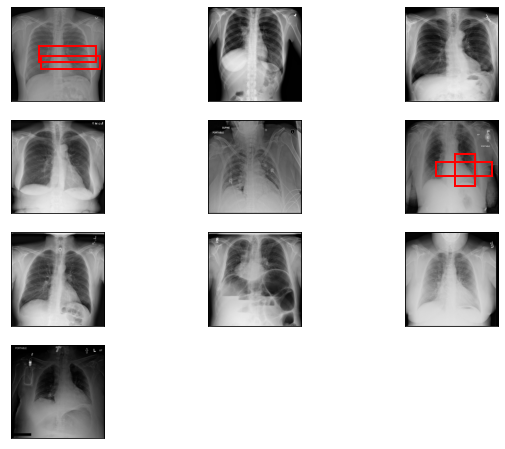

<Figure size 432x288 with 0 Axes>

In [ ]:
create_result_images(test_dir,results.iloc[:10])

### End of Program
[Back to Index](#index)